In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load and Prepare

In [77]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [78]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [79]:
df.drop(['EmployeeCount', 'Over18', 'OverTime', 'StandardHours'], axis = 1, inplace = True) 

In [80]:
df.set_index('EmployeeNumber')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3


In [81]:
df ['Attrition'] = (df['Attrition'] == 'Yes').astype(int)
att = df.pop('Attrition')
att.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

yes -> 1
no -> 0

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [83]:
df ['BusinessTravel'] = (df['BusinessTravel'] == 'Travel_Frequently').astype(int)
df ['Gender'] = (df['Gender'] == 'Male').astype(int)

____
# EDA

____
# Transformation

In [84]:
from sklearn.preprocessing import OrdinalEncoder

df_transf = df.copy()

enc = OrdinalEncoder()
enc.fit(df_transf[['Department', 'EducationField', 'JobRole', 'MaritalStatus']])
df_transf[['Department', 'EducationField', 'JobRole', 'MaritalStatus']] = enc.transform(df_transf[['Department', 'EducationField', 'JobRole', 'MaritalStatus']])
df_transf.head()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,1102,2.0,1,2,1.0,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1.0,8,1,1.0,2,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,0,1373,1.0,2,2,4.0,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1.0,3,4,1.0,5,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,1.0,2,1,3.0,7,1,1,...,3,4,1,6,3,3,2,2,2,2


______
# Features

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


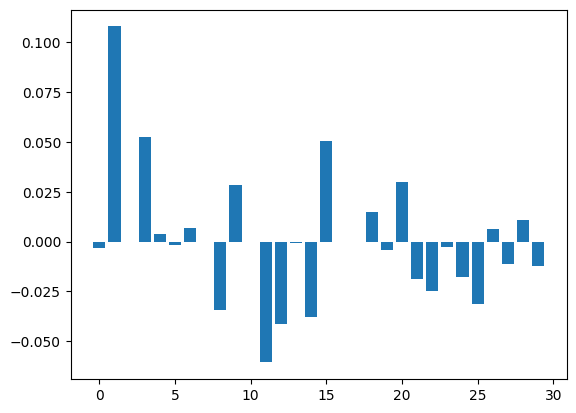

In [86]:
lin_model = LinearRegression()
lin_model.fit(df_transf, att)

importance = lin_model.coef_

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [87]:
print(pd.Series(importance).sort_values(ascending=False).head(3),
      df_transf.columns[pd.Series(importance).sort_values(ascending=False).index[:3]])

1     0.107985
3     0.052541
15    0.050705
dtype: float64 Index(['BusinessTravel', 'Department', 'MaritalStatus'], dtype='object')


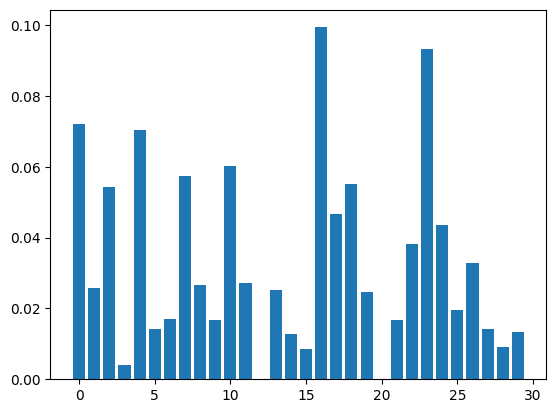

In [88]:
cart_model = DecisionTreeRegressor()
cart_model.fit(df_transf, att)

importance = cart_model.feature_importances_

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [89]:
print(pd.Series(importance).sort_values(ascending=False).head(3),
      df_transf.columns[pd.Series(importance).sort_values(ascending=False).index[:3]])

16    0.099424
23    0.093224
0     0.072113
dtype: float64 Index(['MonthlyIncome', 'TotalWorkingYears', 'Age'], dtype='object')


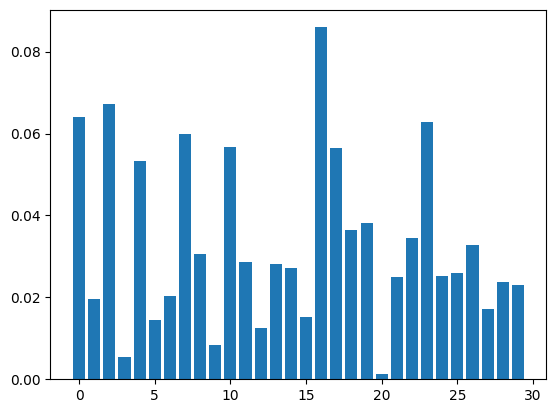

In [90]:
cart_model = RandomForestRegressor()
cart_model.fit(df_transf, att)

importance = cart_model.feature_importances_

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [91]:
print(pd.Series(importance).sort_values(ascending=False).head(3),
      df_transf.columns[pd.Series(importance).sort_values(ascending=False).index[:3]])

16    0.085942
2     0.067316
0     0.063920
dtype: float64 Index(['MonthlyIncome', 'DailyRate', 'Age'], dtype='object')


In [92]:
df_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   int64  
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   float64
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   float64
 7   EmployeeNumber            1470 non-null   int64  
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   int64  
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   float64
 14  JobSatis

In [93]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(df_transf)
features_pca = pca.transform(df_transf)
print("original shape:   ", df_transf.shape)
print("transformed shape:", features_pca.shape)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

original shape:    (1470, 30)
transformed shape: (1470, 3)
[50710777.24379252 22117357.47538099   363038.69250386]
[0.69131838 0.3015165  0.00494915]


In [94]:
yes = att[att==1].index
df.iloc[yes]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,1102,Sales,1,2,Life Sciences,1,2,0,...,3,1,0,8,0,1,6,4,0,5
2,37,0,1373,Research & Development,2,2,Other,4,4,1,...,3,2,0,7,3,3,0,0,0,0
14,28,0,103,Research & Development,24,3,Life Sciences,19,3,1,...,3,2,0,6,4,3,4,2,0,3
21,36,0,1218,Sales,9,4,Life Sciences,27,3,1,...,4,2,0,10,4,3,5,3,0,3
24,34,0,699,Research & Development,6,1,Medical,31,2,1,...,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,1,638,Sales,9,3,Marketing,2023,4,1,...,3,1,1,1,3,2,1,0,1,0
1442,29,0,1092,Research & Development,1,4,Medical,2027,1,1,...,3,2,3,4,3,4,2,2,2,2
1444,56,0,310,Research & Development,7,2,Technical Degree,2032,4,1,...,3,4,1,14,4,1,10,9,9,8
1452,50,1,878,Sales,1,4,Life Sciences,2044,2,1,...,3,4,2,12,3,3,6,3,0,1
